In [231]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import yfinance as yf

In [232]:
# matplotlib Setting
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [233]:
tickers = [
    'AAPL', # 애플
    'AMT', # 아메리칸 타워
    'AMZN', # 아마존닷컴
    'CMG', # 치포틀레 멕시칸 그릴
    'EQIX', # 에퀴닉스
    'MSFT', # 마이크로 소프트
    'SCHD', # SCHWAB US DIVIDEND EQU
    'UNH', # 유나이티드헬스 그룹
    'VOO' # VANGUARD S&P 500 ETF
]

In [234]:
startDate = '2000-01-01'
ohlc = yf.download(tickers,
                      start = startDate)
prices = ohlc["Adj Close"].dropna(how="all")

[*********************100%***********************]  9 of 9 completed


In [235]:
df = prices[prices.index >= startDate]
df

,AAPL,AMT,AMZN,CMG,EQIX,MSFT,SCHD,UNH,VOO
Date,,,,,,,,,
2000-01-03,0.853355,24.067636,4.468750,NaN,NaN,36.555374,NaN,5.520477,NaN
2000-01-04,0.781409,23.811049,4.096875,NaN,NaN,35.320526,NaN,5.449864,NaN
2000-01-05,0.792844,24.529491,3.487500,NaN,NaN,35.692944,NaN,5.437028,NaN
2000-01-06,0.724232,24.272903,3.278125,NaN,NaN,34.497292,NaN,5.636020,NaN
2000-01-07,0.758538,25.607143,3.478125,NaN,NaN,34.948105,NaN,6.297194,NaN
...,...,...,...,...,...,...,...,...,...
2022-09-12,163.429993,265.089996,136.449997,1747.939941,665.469971,266.649994,74.570000,531.250000,377.859985
2022-09-13,153.839996,254.630005,126.820000,1701.060059,636.270020,251.990005,71.699997,513.960022,361.380005
2022-09-14,155.309998,251.820007,128.550003,1721.489990,626.679993,252.220001,71.760002,509.769989,362.730011


In [236]:
daily_ret = df.pct_change()  # 종목 수정 종가데이터의 일별주가상승률
annual_ret = daily_ret.mean() * 252 # 연평균 주가상승률
daily_cov = daily_ret.cov() # 일별주가상승률의 공분산행렬
annual_cov = daily_cov * 252 # 공분산행렬과 영업일 수의 곱

port_ret = [] # 포트폴리오의 일별주가상승률
port_risk = [] # 리스크
port_weights = [] # 비중
sharpe_ratio = []

In [237]:
for _ in tqdm(range(900000)): # 임의로 만들 포트폴리오
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights) # 임의의 가중치를 랜덤으로 부여

    returns = np.dot(weights, annual_ret) # 가중치와 연 수익률 행렬과 내적을 실시
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) # 포트폴리오의 변동성의 기댓값을 산출

    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk)

100%|██████████| 900000/900000 [00:32<00:00, 28121.80it/s]


In [238]:
portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio}
for i, s in enumerate(tqdm(tickers)):
    portfolio[s] = [weight[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df = df[['Returns', 'Risk', 'Sharpe'] + [s for s in tickers]]
df

100%|██████████| 9/9 [00:01<00:00,  6.46it/s]


,Returns,Risk,Sharpe,AAPL,AMT,AMZN,CMG,EQIX,MSFT,SCHD,UNH,VOO
0,0.205244,0.238213,0.861600,0.130088,0.051076,0.052667,0.029481,0.160781,0.263549,0.104189,0.155451,0.052717
1,0.233316,0.267421,0.872468,0.189147,0.106381,0.051188,0.188505,0.196578,0.180877,0.044923,0.023865,0.018535
2,0.186973,0.204988,0.912114,0.075404,0.171081,0.002714,0.092827,0.013279,0.209684,0.166392,0.083012,0.185607
3,0.208738,0.230526,0.905486,0.045207,0.052376,0.203293,0.066588,0.075045,0.184422,0.184812,0.143758,0.044498
4,0.204726,0.209902,0.975339,0.051365,0.051110,0.042678,0.124464,0.123789,0.116317,0.158938,0.167286,0.164053
...,...,...,...,...,...,...,...,...,...,...,...,...
899995,0.229321,0.241083,0.951212,0.070186,0.125556,0.106166,0.115960,0.148636,0.090185,0.073988,0.228978,0.040345
899996,0.235604,0.294834,0.799108,0.179723,0.221073,0.059160,0.053181,0.263824,0.091371,0.003279,0.115935,0.012454
899997,0.204614,0.223311,0.916274,0.084143,0.095242,0.075696,0.001201,0.139369,0.118630,0.129355,0.213473,0.142890
899998,0.208662,0.269803,0.773386,0.001936,0.072799,0.241858,0.085302,0.184877,0.196664,0.086527,0.040918,0.089120


In [239]:
min_risk = df.loc[df['Risk'] == df['Risk'].min()]  # Low RisK
max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]  # Max Sharpe

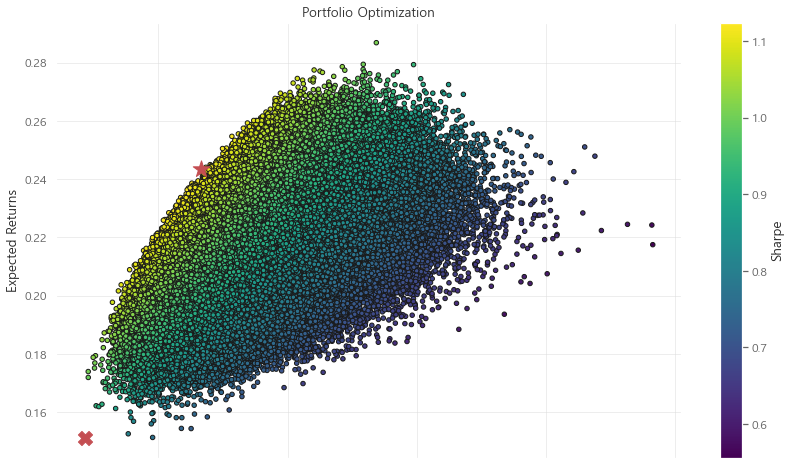

In [240]:
df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap='viridis',
                edgecolors='k', grid=True)
# 샤프지수가 가장 큰 포트폴리오
plt.scatter(x=max_sharpe['Risk'], y=max_sharpe['Returns'], c='r',
            marker='*', s=300)
# 리스크가 제일 작은 포트폴리오
plt.scatter(x=min_risk['Risk'], y=min_risk['Returns'], c='r',
            marker='X', s=200)
plt.title('Portfolio Optimization')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()

In [241]:
min_risk

,Returns,Risk,Sharpe,AAPL,AMT,AMZN,CMG,EQIX,MSFT,SCHD,UNH,VOO
516686,0.151049,0.171426,0.881135,0.016757,0.035198,0.014859,0.019183,0.000557,0.123056,0.354253,0.02762,0.408519


In [242]:
max_sharpe

,Returns,Risk,Sharpe,AAPL,AMT,AMZN,CMG,EQIX,MSFT,SCHD,UNH,VOO
632149,0.243389,0.216575,1.123805,0.209514,0.050348,0.031132,0.222429,0.013047,0.016246,0.233297,0.222088,0.001898


In [243]:
stock_weight_dict = dict(zip(list(max_sharpe[tickers].columns),
                             max_sharpe[tickers].values.flatten().tolist()))
stock_weight_dict

{'AAPL': 0.2095143912585707,
 'AMT': 0.05034790856811354,
 'AMZN': 0.031132476790552126,
 'CMG': 0.22242852529285229,
 'EQIX': 0.01304699966944986,
 'MSFT': 0.01624621733694136,
 'SCHD': 0.2332969644610244,
 'UNH': 0.22208809107911046,
 'VOO': 0.001898425543385477}

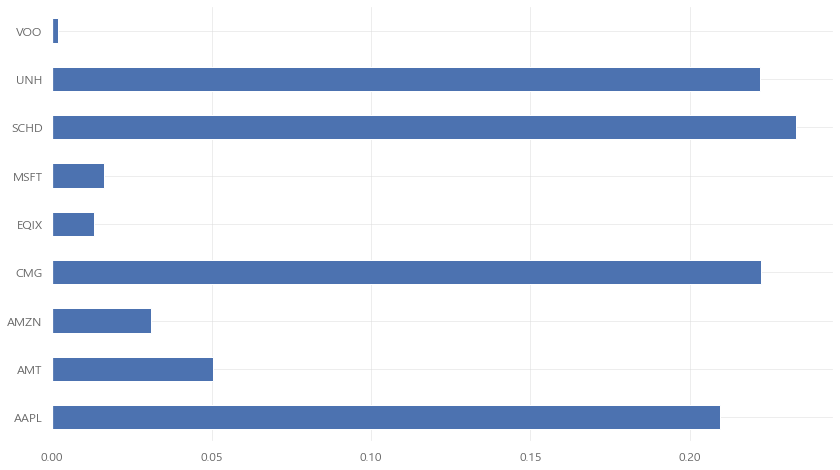

In [244]:
from collections import OrderedDict

weights = OrderedDict(stock_weight_dict)
pd.Series(weights).plot.barh();

In [245]:
def print_orderdict(dict, postfix='%', space=8, title='', line=1):
    print(title)
    idx = 0
    for i in dict:
        idx += 1
        if postfix=='%':
            num = str(round(dict[i]*100, 2))
        else:
            num = str(dict[i])
        print(i.ljust(6), (num+postfix).rjust(space), end="")
        if idx % line == 0:
            print()

In [246]:
# TODO: 투자금 입력
deposit = 20000

In [247]:
from pypfopt.discrete_allocation import DiscreteAllocation

latest_prices = prices.iloc[-1] # 마지막 종가 기준

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=deposit)
allocation, leftover = da.lp_portfolio()

buy = 0
for k  in allocation:
    buy += latest_prices[k] * allocation[k]

print("Total Asset($): ", deposit)
print("Total buy($): ", round(buy, 2), ", leftover($):", round(deposit - buy, 2))
print_orderdict(allocation,
                postfix=" stk",
                title="** Optimal Weights **")

Total Asset($):  20000
Total buy($):  19676.99 , leftover($): 323.01
** Optimal Weights **
AMT       6 stk
AMZN     10 stk
CMG       3 stk
EQIX      1 stk
MSFT      3 stk
SCHD     77 stk
UNH       9 stk
VOO       1 stk


C:\Users\Sun Lee\AppData\Roaming\Python\Python39\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
